<a href="https://colab.research.google.com/github/m7saikat/IE-7374/blob/master/Lab_2(b)_MABs_Nonstationary_SampleAverage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 2-b: Multi-armed Bandits Problem (Nonstationary with Sample Average)
## 1- Introduction
We often encounter reinforcement learning problems that are effectively `nonstationary`, i.e the true values are changed over time. In such cases it makes sense to give more weight to recent rewards than to long-past rewards.We need a slight modification to transform the stationary problem to non-stationary.

 The true value $q_{*}(a)$ of each of the ten actions is selected according to a normal distribution with mean zero and unit variance `(Gaussian Distribution)`, and then the actual rewards were selected according to a mean $q_{*}(a)$ unit variance normal distribution.

### Importing Libraries


---


In [0]:
import numpy as np
import matplotlib.pyplot as plt

### Calculting and displaying true rewards values: <span style="color:red">`Gaussian Distribution`</span> 
---

For the non stationary rewards, we vary the expected action value by a small variation over time.

We use a modiﬁed version of the 10-armed testbed in which all the $q(a)$ start out equal and then take independent random walks, by adding a normally distributed increment with mean $0$ and standard deviation $1$ to all the   $q(a)$ on each step. 

In [0]:
# Mean Reward of Arms (Gaussian (0,1))
arms = 10 # Arms of bndit problem
rs = np.random.RandomState(seed=100)

# The following line generates a list of expected action values corresponding to reach arm
# The 10 values are randomly chosen from a gaussian distribution of range -1 to 1.
expected_action_value = rs.uniform(-1, 1, arms) 

# Calculating the mean of the the expected action values.
np.mean(expected_action_value) # Avergae of means should be 0
print(" random-state object: {},\n expected action values: {},\n Mean: {}".format(rs, expected_action_value, np.mean(expected_action_value)))


 random-state object: <mtrand.RandomState object at 0x0000018E6ADA0900>,
 expected action values: [ 0.08680988 -0.44326123 -0.15096482  0.68955226 -0.99056229 -0.75686176
  0.34149817  0.65170551 -0.72658682  0.15018666],
 Mean: -0.11484844282561713


Text(0,0.5,'Expected Action Value / Reward Distribution')

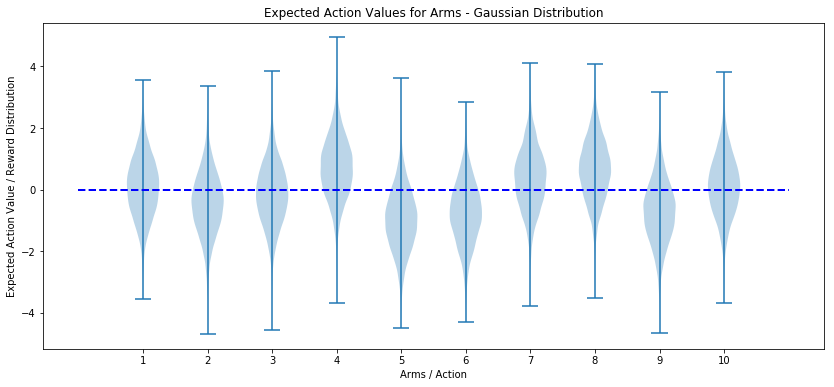

In [0]:
# We are tryig to generate the 10-armed testbed of the bandit problem.
# The true value q∗(a) of each of the ten actions was selected according to a normal distribution with mean zero and unit variance
Qa = expected_action_value + np.random.normal(scale=1, size=(10000, arms)) # Scale of 1 indiactes all arms have standard deviation of 1.

# Genrating the objects corresponding to the figure and the axis of the image shown below.
f, ax = plt.subplots(figsize=(14, 6))

# Generating the violin plot, the rewards corresponding to the 10 arms of the andit test bed as shown below
# A violin plot is a method of plotting numerical data combining the vision of the probability density of each variable with its associated boxplot or dots.
ax.violinplot(Qa)

# Generating the labels corresponding to each arm of the bandit
# Using xticks we can get or set the current tick locations and labels of the x-axis.
x_pos = range(1,arms+1)
plt.xticks(x_pos)

# Superimposing the base line on the violin plot. 
plt.plot([0,len(x_pos)+1],[0,0] ,'b--',lw=2)

# Set the axis, title and the labels for the axis.
ax.set_title("Expected Action Values for Arms - Gaussian Distribution")
ax.set_xlabel("Arms / Action")
ax.set_ylabel("Expected Action Value / Reward Distribution")
#plt.ylim(-20, 20)


## 2- Problem Definition
### Expected initial action value $(\mu)$
---
Given a standard deviation $\mu$, $scale$ and number of values required, i.e. $arms$ this function returns the initial expected action values corresponding to each arm for each bandit problem.


In [0]:
# This function generates the true value of actions
def expected_action_value_function(mu=0, scale=1, arms=10):
    expected_action_value = np.random.uniform(-1,1 , arms)
    return expected_action_value

### Adding randomness to the expected action values (`non-stationary`)


---
In the non-stationary case, the mean of action values changes over time. To represent this, we add a slight randomness to the 
true dist means ($\mu$), using a normal random variable with standard deviation of $0.01$. Rememebr, this is not the st. Dev. of of the action value distribution, but it is randomeness that just represents the change of mean from one scenario to another. 


In [0]:
def update_expected_action_value(expected_action_value):
    expected_action_value += np.random.normal(0, 0.01, arms) 
    return(expected_action_value)

### <span style="color:red">Reward function</span> 

---

This function returns true rewards corresponding to each action taken for a particular step. As we know the true rewards , i.e the rewards corresponding to the 10 action values, $q∗(a), a = 1,...,10,$ are selected according to a normal (Gaussian) distribution with mean $0$ and variance $1$.

In [0]:
def reward_function(action_taken, expected_action_value,scale=1):
    reward = expected_action_value [action_taken] + np.random.normal(scale=scale) # reward=N(Mu,1) or Mu+N(0,1)
    return reward


## 3- Solution Approach
### Methods 1:  <span style="color:blue">$\epsilon-greedy$</span>  function 

---

In [0]:
# Define the e-greedy funtion
def e_greedy(estimate_action_value,e,arms): 
    # genereate a random num (0,1) to be compared with epsilon
    e_estimator = np.random.uniform(0, 1) 
    # epsilon-greedy appraoch
    action = np.argmax(estimate_action_value) if e_estimator > e else np.random.choice(np.arange(arms))
    return action

### Action Value estimation-  <span style="color:blue">Method 1: Sample Average approach</span> 

---




In [0]:
# Define estimate_action_value function (using sample average method)
def sample_average (estimate_action_value, action, reward, count):
    estimate_action_value[action] = estimate_action_value[action] + (1/(count[action]+1))\
        * (reward - estimate_action_value[action])
    return estimate_action_value

### The k-armed bandit problem

---

In [0]:
def multi_arm_bandit_problem(arms = 10, steps = 1000, e = 0.1, expected_action_value = [],scale=1 ):
    # Initilization 
    overall_reward, optimal_action = [], [] 

    # Initial Action values is set to zero 
    estimate_action_value = np.zeros(arms)

    #number of times is action (arm) is taken 
    count = np.zeros(arms) 

    # Main loop
    for s in range(0, steps):

        # Select an action
        action=e_greedy(estimate_action_value,e, arms)

        # Adding randomness to the action value for each bandit problem,
        # thus simulating variable rewards over time. This segment makes a stationary
        # reward system, non-stationary.
        expected_action_value = update_expected_action_value(expected_action_value) 

        # Observe the reward for the selected Action
        reward = reward_function(action, expected_action_value,scale)

        # Update Estimates of Action Value for the selected Action based on its observed Reward
        estimate_action_value=sample_average(estimate_action_value, action, reward, count)
        
        # Update rewards' list
        overall_reward.append(reward)

        # If the optimal action is taken
        optimal_action.append(action == np.argmax(expected_action_value))

        # Increment the number of times the selected action is takern
        count[action] += 1
        
    return overall_reward, optimal_action

### Multi-arm testbed

---


In [0]:
# The k-armed bandits testbed
def run_game(epsilon, runs = 5000, steps = 1000, mu=0, scale=1, arms = 10):
    rewards = np.zeros((runs, steps))
    optimal_actions = np.zeros((runs, steps))
    expected_action_value = expected_action_value_function(mu=mu, scale=scale , arms=arms)
    # Replicate each expreiment                                 
    for run in range(0, runs):
        rewards[run][:], optimal_actions[run][:] = multi_arm_bandit_problem(arms = arms, 
                                                                            steps = steps,
                                                                            e = epsilon,
                                                                            expected_action_value = expected_action_value, 
                                                                            scale=scale)
    rewards_avg = np.average(rewards, axis = 0)
    optimal_action_perc = np.average(optimal_actions, axis = 0)
    return(rewards_avg, optimal_action_perc)

### Plotting the reward performance and optimal action percentage of the agents with different epsilon values.


---

In [0]:
# Number of arms of bandits.
arms=10

# Numner of episodes in each run
steps = 1000

# Total number of runs
runs = 2000  

# The list of corresponding epsilon values for both the plots
Epsilons=[0.0, 0.01, 0.1]

In [0]:
# Running the Experiment with different Epsilon Values
rewards_avg_by_epsilon = dict()
optimal_action_perc_by_epsilon = dict()
for epsilon in Epsilons:
    print('Running for epsilon {}'.format(epsilon))
    rewards_avg, optimal_action_perc = run_game(epsilon, runs=runs, steps=steps, arms=arms)
    rewards_avg_by_epsilon[epsilon] = rewards_avg
    optimal_action_perc_by_epsilon[epsilon] = optimal_action_perc

print('Experiment is complete')    

Running for epsilon 0.0
Running for epsilon 0.01
Running for epsilon 0.1
Experiment is complete


Text(0,0.5,'Average Reward')

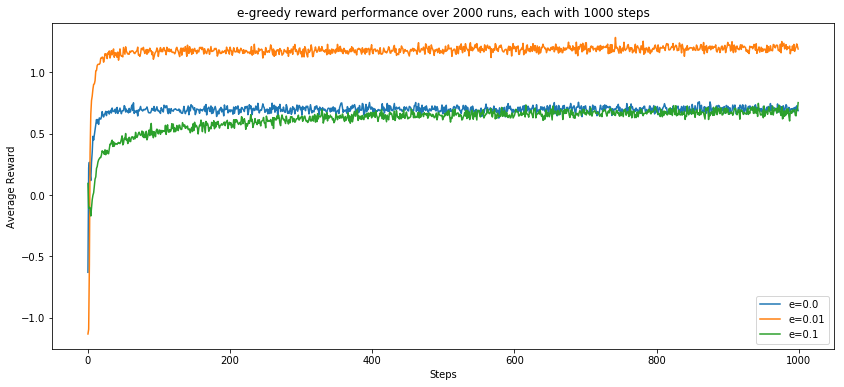

In [0]:
f, ax = plt.subplots(nrows=1, ncols=1,figsize=(14, 6))
for epsilon in Epsilons:
    ax.plot(range(steps), rewards_avg_by_epsilon[epsilon], label='e={}'.format(epsilon))
ax.legend(loc='lower right')
plt.title('e-greedy reward performance over {}'.format(runs) +' runs, each with {}'.format(steps) + ' steps')
plt.xlabel('Steps')
plt.ylabel('Average Reward')

(0, 1)

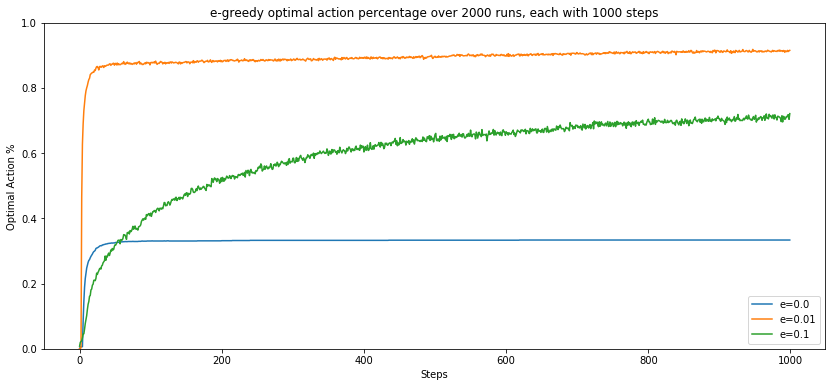

In [0]:
f, ax = plt.subplots(figsize=(14, 6))
for epsilon in Epsilons:
    ax.plot(range(steps), optimal_action_perc_by_epsilon[epsilon], label='e={}'.format(epsilon))
ax.legend()
plt.title('e-greedy optimal action percentage over {}'.format(runs) +' runs, each with {}'.format(steps) + ' steps')
plt.xlabel('Steps')
plt.ylabel('Optimal Action %')
ax.set_ylim(0,1) #Max for 100%